In [ ]:
import pandas as pd
import numpy as np


# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [26]:
import pandas as pd
import sqlite3

# write your code here
conn = sqlite3.connect('../db.sqlite3')

query = """
SELECT 
    roi.id,
    roi.quantity,
    roi.order_id,
    roi.product_id,
    rp.name AS product_name,
    rp.price AS product_price,
    ro.datetime
FROM 
    restaurant_orderitem roi
JOIN 
    restaurant_product rp ON roi.product_id = rp.id
JOIN 
    restaurant_order ro ON roi.order_id = ro.id;
"""
df = pd.read_sql(query, conn)
print(df) 


          id  quantity  order_id  product_id           product_name  \
0          1         2         1           6          Plain Papadum   
1          2         1         1         240       King Prawn Balti   
2          3         1         1          19            Garlic Naan   
3          4         1         1          36          Mushroom Rice   
4          5         1         1         111    Paneer Tikka Masala   
...      ...       ...       ...         ...                    ...   
74813  74814         2      3255         247    House Red wine 75cl   
74814  74815         2     12905         247    House Red wine 75cl   
74815  74816         2      3272         247    House Red wine 75cl   
74816  74817         1     11404         248  House white wine 75cl   
74817  74818         1     11449         247    House Red wine 75cl   

       product_price             datetime  
0               0.80  2019-08-03 20:25:00  
1              12.95  2019-08-03 20:25:00  
2              

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

Text(0.5, 1.0, 'Top 10 Most Popular Products by Quantity Sold')

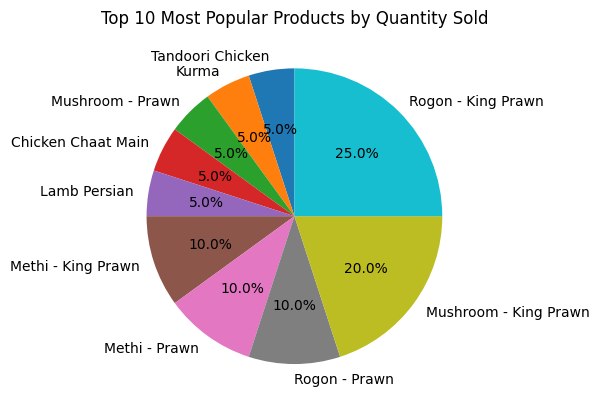

In [46]:
# write your code here
import matplotlib.pyplot as plt

top_products = df.groupby(['product_id', 'product_name'])['quantity'].sum().reset_index().sort_values(by='quantity').head(10)

plt.plot(figsize=(10,8))
plt.pie(top_products['quantity'], labels=top_products['product_name'], autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Most Popular Products by Quantity Sold')


# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

Text(0.5, 1.0, 'Top 10 Most Popular Products with Price')

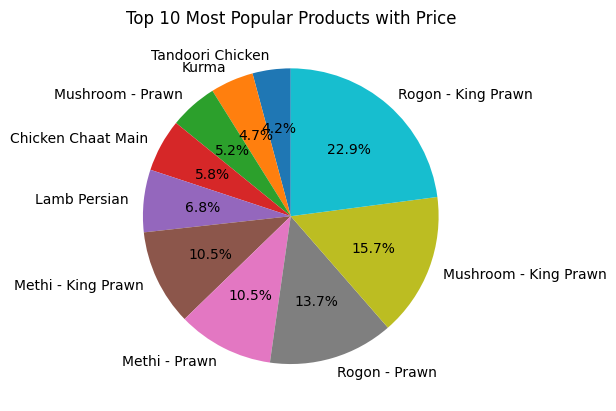

In [51]:
# write your code here
df['item_price'] = df['product_price']*df['quantity']
top_products_by_revenue = df.groupby(['product_id', 'product_name'])['item_price'].sum().reset_index().sort_values(by='item_price').head(10)

plt.plot(figsize=(10,8))
plt.pie(top_products_by_revenue['item_price'], labels=top_products['product_name'], autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Most Popular Products with Price')


# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

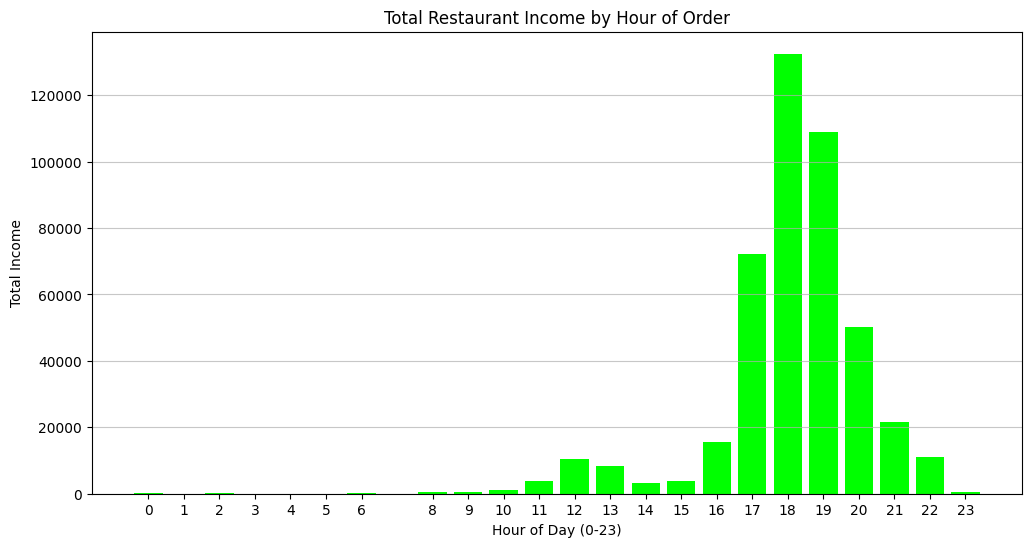

In [73]:
# write your code here
df['datetime'] = pd.to_datetime(df['datetime'])
df['order_hour'] = df['datetime'].dt.hour
hourly_income = df.groupby('order_hour')['item_price'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(hourly_income['order_hour'], hourly_income['item_price'], color='lime')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Total Income')
plt.title('Total Restaurant Income by Hour of Order')
plt.xticks(hourly_income['order_hour']) 
plt.grid(axis='y', linestyle='-', alpha=0.7)


# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

/var/folders/nw/m4qvq5bj1qs9kv9qcfc6y_n80000gp/T/ipykernel_7949/481701733.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_income = df.groupby('order_day')['item_price'].sum().reset_index()


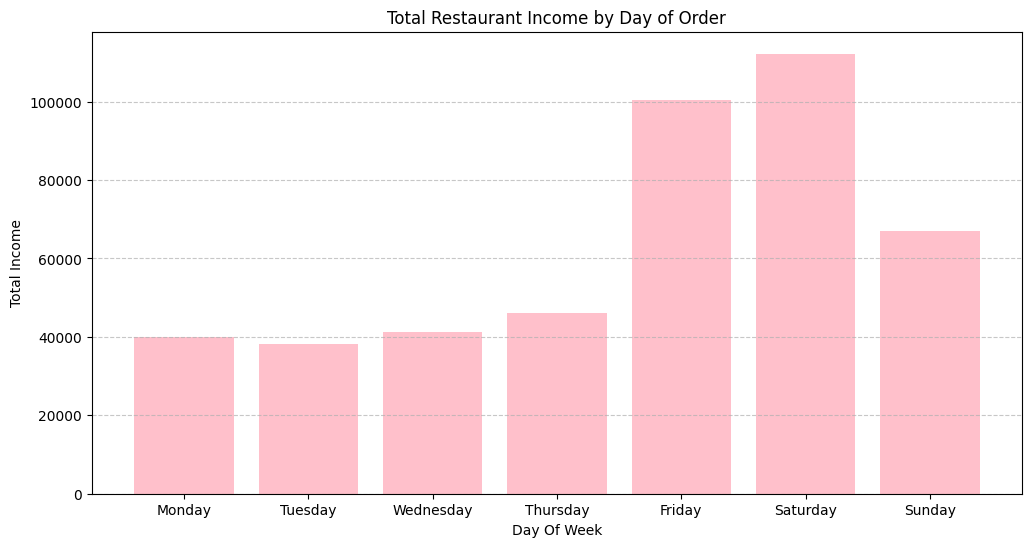

In [93]:
# write your code here
df['datetime'] = pd.to_datetime(df['datetime'])
df['order_day'] = df['datetime'].dt.day_name()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['order_day'] = pd.Categorical(df['order_day'], categories=days, ordered=True)

daily_income = df.groupby('order_day')['item_price'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(daily_income['order_day'], daily_income['item_price'], color='pink')
plt.xlabel('Day Of Week')
plt.ylabel('Total Income')
plt.title('Total Restaurant Income by Day of Order')
plt.xticks(daily_income['order_day']) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
